# Importar pandas y leer el csv

* Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/01_ML/co_properties.csv"

In [2]:
df = pd.read_csv(path)

# Limpieza básica

* Dejamos solo l1, l2,l3 l4

In [3]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [4]:
cols = ["l1", "l2", "l3", "l4", "price"]
cols_to_delete = []

for col in df.columns:
  if col not in cols:
    cols_to_delete.append(col)
  else:
    continue

df.drop(cols_to_delete, axis =1, inplace=True)
df

,l1,l2,l3,l4,price
0,Colombia,Antioquia,NaN,NaN,9.000000e+07
1,Colombia,Antioquia,NaN,NaN,4.500000e+08
2,Colombia,Antioquia,NaN,NaN,2.600000e+09
3,Colombia,Antioquia,NaN,NaN,9.500000e+07
4,Colombia,Valle del Cauca,Cali,NaN,1.700000e+08
...,...,...,...,...,...
999995,Colombia,Risaralda,Pereira,NaN,2.300000e+09
999996,Colombia,Valle del Cauca,Cali,NaN,6.000000e+08
999997,Colombia,Antioquia,NaN,NaN,9.850000e+08
999998,Colombia,Valle del Cauca,El Cerrito,NaN,2.700000e+09


* Renombramos, eliminamos nulos y pais

In [5]:
#Cambio de nombre
df.rename(columns={
    "l1": "pais", "l2":"departamento", "l3":"municipio", "l4": "barrio" 
}, inplace=True)
df.drop(["pais"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   departamento  1000000 non-null  object 
 1   municipio     923562 non-null   object 
 2   barrio        310739 non-null   object 
 3   price         994877 non-null   float64
dtypes: float64(1), object(3)
memory usage: 30.5+ MB


In [6]:
df.dropna(inplace=True)
df.columns

Index(['departamento', 'municipio', 'barrio', 'price'], dtype='object')

# Analisis exploratorio

## Análisis básico, preutnas de negocio

* Cuantas categorias distintas hay en departamento

In [7]:
df["departamento"].nunique()

6

* Departamentos con mas publicaciones

In [8]:
df["departamento"].value_counts().head(3)

Cundinamarca       192207
Antioquia           93287
Valle del Cauca     14930
Name: departamento, dtype: int64

##Analiza solo propiedes de Antioquia

* Saco solo propiedades en Antioquia

In [9]:
filtro = df["departamento"].str.contains("Antioquia")
df = df[filtro]

* Veo Cuantas categorías nicas hay en e descriptor

In [10]:
print(df["departamento"].nunique())
print(df["municipio"].nunique())
print(df["barrio"].nunique())

1
1
21


# Procesado de datos

* Split target - patron

In [11]:
x = df.barrio
y = df.price

* Split train - test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [13]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.9 MB/s eta 0:00:00


In [14]:
from category_encoders import OneHotEncoder

* Miremos como funcioa el encoder

In [15]:
#Creo el ohe
ohe = OneHotEncoder(use_cat_names = True)

#defino el patron, en cuales uso 1´s
ohe.fit(X_train)

#aqyu aplico el patron a os fatos
XT_train = ohe.transform(X_train)

#miro ahora ucantos descriptores
print(XT_train.shape)

XT_train.head()

(74629, 21)


,barrio_Laureles,barrio_El Poblado,barrio_La América,barrio_Robledo,barrio_Buenos Aires,barrio_Guayabal,barrio_Belén,barrio_Candelaria,barrio_Aranjuez,barrio_San Javier,...,barrio_San Antonio de Prado,barrio_Castilla,barrio_Manrique,barrio_Altavista,barrio_San Cristóbal,barrio_Santa Elena,barrio_Doce de Octubre,barrio_Popular,barrio_Palmitas,barrio_Santa Cruz
753202,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411414,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9475,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
675157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Entrenamiento

## Entrenamiento con linear

* Creo pipeline y modelo con el pipeline

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

* Creo modelo

In [18]:
# aqui le indico al modelo que tiene que hacer OHE, pero le paso datos sin hacer OHE
model = make_pipeline (
    OneHotEncoder(use_cat_names = True),
    LinearRegression()
)

* Entreno

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['barrio'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

* Predigo

In [20]:
y_pred_test = model.predict(X_test)

* Evaluacion del modelo

In [21]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE: \t", round(mae_test, 2))
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE: \t", round(mse_test, 2))
r2_test = r2_score(y_test, y_pred_test)
print("Test r2: \t", round(r2_test, 7))

Test MAE: 	 361895670.0
Test MSE: 	 3.1752734782867953e+18
Test r2: 	 0.0116679


* Comunicar resultados del modelo

In [22]:
intercept = model.named_steps["linearregression"].intercept_
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len: \t", len(coefficients)) #cuantos dan e total? 21, por 
print(coefficients[:5]) #primeros 5

coefficients len: 	 21
[1.55112073e+21 1.55112073e+21 1.55112073e+21 1.55112073e+21
 1.55112073e+21]


## Entrenamiento con Ride, regulatricemos porque está overfitting

* Creo modelo

In [23]:
# aqui le indico al modelo que tiene que hacer OHE, pero le paso datos sin hacer OHE
model = make_pipeline (
    OneHotEncoder(use_cat_names = True),
    Ridge()
)

* Entreno

In [24]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['barrio'], use_cat_names=True)),
                ('ridge', Ridge())])

* Predigo

In [25]:
y_pred_test = model.predict(X_test)

* Evaluo

In [26]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE: \t", round(mae_test, 2))
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE: \t", round(mse_test, 2))
r2_test = r2_score(y_test, y_pred_test)
print("Test r2: \t", round(r2_test, 7))

Test MAE: 	 361804044.37
Test MSE: 	 3.175328560485627e+18
Test r2: 	 0.0116508


In [27]:
# BAJAN coef´s , generaliza de mejor manera
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("coefficients len: \t", len(coefficients)) #cuantos dan e total? 21, por 
print(coefficients[:5]) #primeros 5

coefficients len: 	 21
[-6.13898332e+07  1.91448390e+08 -1.54886308e+08 -2.01503303e+08
 -9.60826004e+07]


# Comunicar resultados

In [28]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len: \t", len(feature_names) )
print(feature_names[:5]) 

features len: 	 21
['barrio_Laureles', 'barrio_El Poblado', 'barrio_La América', 'barrio_Robledo', 'barrio_Buenos Aires']


/usr/local/lib/python3.9/dist-packages/category_encoders/utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [29]:
#creo pd Series con esa data
feat_imp = pd.Series(coefficients, index = feature_names)
feat_imp.head()

barrio_Laureles       -6.138983e+07
barrio_El Poblado      1.914484e+08
barrio_La América     -1.548863e+08
barrio_Robledo        -2.015033e+08
barrio_Buenos Aires   -9.608260e+07
dtype: float64

In [32]:
# creo la ecuacion
print(f"price = {intercept.round(2)}")

for f,c in feat_imp.items():
  print(f"+ ({round(c,2)} * {f})")

price = 321529319.76
+ (-61389833.17 * barrio_Laureles)
+ (191448389.66 * barrio_El Poblado)
+ (-154886307.84 * barrio_La América)
+ (-201503302.7 * barrio_Robledo)
+ (-96082600.43 * barrio_Buenos Aires)
+ (103721542.21 * barrio_Guayabal)
+ (-100233487.34 * barrio_Belén)
+ (-25689184.37 * barrio_Candelaria)
+ (-196084179.31 * barrio_Aranjuez)
+ (-217806361.74 * barrio_San Javier)
+ (-137426671.31 * barrio_Villa Hermosa)
+ (-96556354.45 * barrio_San Antonio de Prado)
+ (-92011868.62 * barrio_Castilla)
+ (-182341783.47 * barrio_Manrique)
+ (-101465073.59 * barrio_Altavista)
+ (-151257329.29 * barrio_San Cristóbal)
+ (1006800561.25 * barrio_Santa Elena)
+ (-142582559.54 * barrio_Doce de Octubre)
+ (134191229.86 * barrio_Popular)
+ (631273431.73 * barrio_Palmitas)
+ (-110118257.57 * barrio_Santa Cruz)


Text(0.5, 1.0, 'Feature importance for property price')

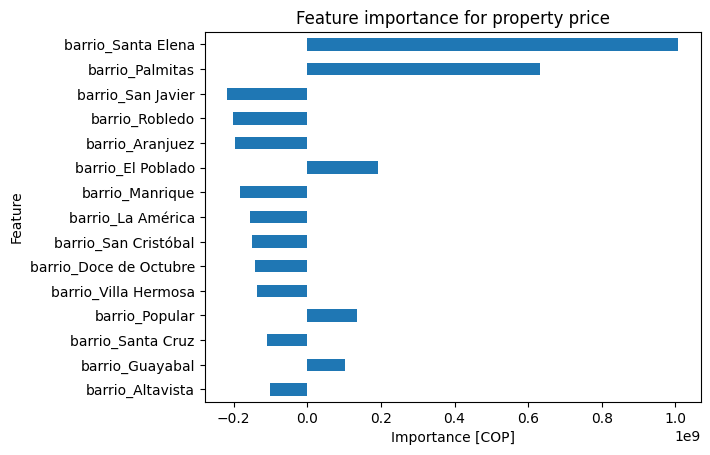

In [31]:
feat_imp.sort_values(key = abs).tail(15).plot(kind="barh")
plt.xlabel("Importance [COP]")
plt.ylabel("Feature")
plt.title("Feature importance for property price")

# Widgets para hacer DESPLIEGUE

* Importamos widgets

In [33]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [34]:
X_test.head(1)

541865    Villa Hermosa
Name: barrio, dtype: object

* Para hacer predicciones a datos ingresados, creo funcion

In [35]:
def make_predictions(bar):
    #le paso el barrio
    data = {
        "barrio": bar
    }

    #lo paso a df
    df = pd.DataFrame(data, index =[0])

    #Predigo
    prediction = model.predict(df).round(2)[0]


    #imprimo resultados
    return f"Predictd Price: \t ${prediction}"

In [36]:
#muestro las 2 primeras instancias d prueba
X_test.head(2)

541865    Villa Hermosa
753111          Robledo
Name: barrio, dtype: object

* Ejemplo de predicción para algún barrio

In [38]:
#hagamos la prediccion para ese barrio villa ermosa
make_predictions("Villa Hermosa")

'Predictd Price: \t $184102648.45'

In [39]:
#compruebo la diferencia
y_test.head(2)

541865    4.300000e+09
753111    8.500000e+05
Name: price, dtype: float64

* Despliegue

In [43]:
X_train

753202        Laureles
411414      El Poblado
9475        La América
675157      La América
114205        Laureles
              ...     
72253       Candelaria
594716           Belén
826390        Guayabal
13920         Laureles
185761    Buenos Aires
Name: barrio, Length: 74629, dtype: object

In [47]:
interact(
    #funcion a ejecutar con la data que recibe
    make_predictions,
    # variable, recibida de Dropdown
    bar = Dropdown(options = sorted(X_train.unique()))
    #bar = Dropdown(options = sorted(X_train["barrio"].unique()))
);

interactive(children=(Dropdown(description='bar', options=('Altavista', 'Aranjuez', 'Belén', 'Buenos Aires', '…